<a href="https://colab.research.google.com/github/vinuthasiddam/Machine_Learning-algorithm/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib. pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston

%matplotlib inline

In [0]:
boston=load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
features=pd.DataFrame(boston.data,columns=boston.feature_names)
target=pd.DataFrame(boston.target,columns=['Target'])
data=pd.concat([features,target],axis=1)

In [5]:
data2=data.corr('pearson')
abs(data2.loc['Target']).sort_values(ascending=False)

Target     1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [0]:
X=data['LSTAT']
Y=data['Target']

In [0]:
X=np.array(X/X.mean())
Y=np.array(Y/Y.mean())

In [0]:
n=int(0.8*len(X))
x_train=X[:n]
y_train=Y[:n]
x_test=X[n:]
y_test=Y[n:]

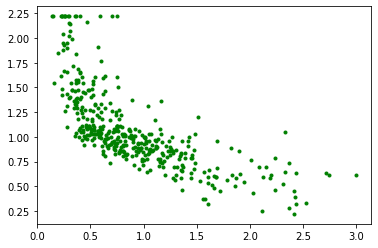

In [9]:
plt.plot(x_train,y_train,'g.')

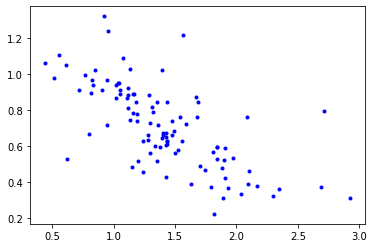

In [10]:
plt.plot(x_test,y_test,'b.')

In [0]:
def hypothesis(a,b,x):
  return a*x+b

In [0]:
def error(a,b,x,y):
  e=0
  m=len(y)
  for i in range(m):
    e+=np.power((hypothesis(a,b,x[i])-y[i]),2)
  return(1/(2*m))*e

In [0]:
def descend(initial_a,initial_b,x,y,learning_rate,iterations):
 a=initial_a 
 b=initial_b
 for i in range(iterations):
   e=error(a,b,x,y)
   if i%1000==0:
    print(f"Error:{e},a:{a},b:{b}")

   a,b=step_gradient(a,b,x,y,learning_rate)
 return a,b

In [0]:
def step_gradient(a,b,x,y,learning_rate):
  grade_a=0
  grade_b=0
  m=len(x)
  for i in range(m):
   grade_a+=1/m*(hypothesis(a,b,x[i]-y[i])*x[i])
   grade_b+=1/m*(hypothesis(a,b,x[i]-y[i]))
  a=a-(grade_a*learning_rate)
  b=b-(grade_b*learning_rate)
  return a,b

In [15]:
a=1
b=1
learning_rate=0.01
iterations=10000

final_a,final_b = descend(a,b,x_train,y_train,learning_rate,iterations)

Error:0.7258561959456158,a:1,b:1
Error:0.6658793089060624,a:-0.004992534737140047,b:-0.0018707116395577418
Error:0.6598242377147306,a:7.764682202275386e-07,b:-1.2232427242303525e-06
Error:0.6598235362053027,a:1.1592265767866033e-08,b:5.313568080465213e-09
Error:0.6598235512596853,a:-9.305778135503778e-12,b:-4.4151698920705415e-13
Error:0.6598235512517412,a:-2.211027682012743e-14,b:-1.2584217847296258e-14
Error:0.6598235512517093,a:3.669727523831253e-17,b:9.130082747151202e-18
Error:0.6598235512517093,a:3.0034234661406893e-20,b:2.4624874981005245e-20
Error:0.6598235512517093,a:-1.0810273274715475e-22,b:-3.788256896931632e-23
Error:0.6598235512517093,a:-3.483054974879485e-27,b:-3.536419287892921e-26


In [16]:
print(error(a,b,x_train,y_train))

0.7258561959456158


In [17]:
print(error(final_a,final_b,x_train,y_train))

0.6598235512517093


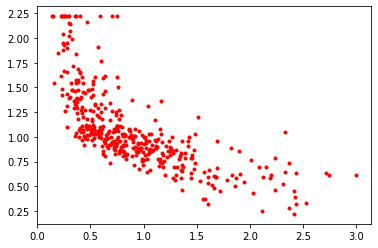

In [18]:
plt.plot(x_train,y_train,'r.')

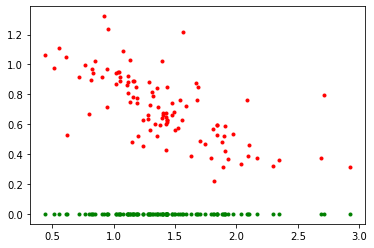

In [19]:
plt.plot(x_test,y_test,'r.',x_test,hypothesis(final_a,final_b,x_test),'g.')